In [1]:
# IMPORT THE NECESSARY LIBRARIES
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# READ/OPEN THE DATA
file_path = '/Volumes/TOSHIBA EXT/4t curs/Advanced Bioinformatics/Project/Python/expressiondata_id.csv'
df = pd.read_csv(file_path, index_col = 0)
df.head(5)

,77322072-2a7f-49e6-a9d1-c521c25acd70.rna_seq.augmented_star_gene_counts.tsv,6f6bf240-1ca4-47d0-9a77-17b0ce9b8ae7.rna_seq.augmented_star_gene_counts.tsv,59e8b7b7-5183-4655-aa5e-e4b5ba73eded.rna_seq.augmented_star_gene_counts.tsv,5418228b-cfd0-4580-87c6-3ebf6282ad73.rna_seq.augmented_star_gene_counts.tsv,c7fd0bf8-753e-45d6-b987-51ec7559f728.rna_seq.augmented_star_gene_counts.tsv,50c308c9-922a-4083-ae09-e5e4d8c437af.rna_seq.augmented_star_gene_counts.tsv,55071ef3-bf09-43a2-a54c-a9ec61a84615.rna_seq.augmented_star_gene_counts.tsv,7d9c7c34-76e0-4622-b5f7-60e12f6d4e07.rna_seq.augmented_star_gene_counts.tsv,32675d71-6f79-4b8f-ab7c-e2350b15875c.rna_seq.augmented_star_gene_counts.tsv,3d11905a-16eb-40b2-a36b-e37dca6359d3.rna_seq.augmented_star_gene_counts.tsv,...,4c87674d-dd05-490d-a584-84490509f4d4.rna_seq.augmented_star_gene_counts.tsv,5cfb768f-7b49-4a72-92c9-d7502f5ba5b8.rna_seq.augmented_star_gene_counts.tsv,03ef99c7-55b7-4770-9eac-2ee007aa78ca.rna_seq.augmented_star_gene_counts.tsv,3ab1dfbc-ab83-446e-b680-cd6aec12b177.rna_seq.augmented_star_gene_counts.tsv,029a2c3e-0fd1-4cb4-9021-3947d28ca28d.rna_seq.augmented_star_gene_counts.tsv,ed41fe8b-fe2e-4bf3-91e3-2cf50ddcbc78.rna_seq.augmented_star_gene_counts.tsv,b9a5766c-e155-423e-a075-10fb14fe87df.rna_seq.augmented_star_gene_counts.tsv,a462c0f9-23d3-428b-9b61-e42cb6a68af1.rna_seq.augmented_star_gene_counts.tsv,0d3cfbc0-4420-48ed-a459-2e18d2ece5b6.rna_seq.augmented_star_gene_counts.tsv,d43517e2-e447-42cc-93e1-cbc9669ef4f1.rna_seq.augmented_star_gene_counts.tsv
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.15,56.8355,74.7327,57.7846,46.0126,12.4196,53.8879,96.3471,68.3735,33.3739,33.3062,...,31.1013,32.6715,52.2535,33.1116,45.6996,56.9952,51.5911,39.8503,44.8110,14.0432
ENSG00000000005.6,0.0000,0.1668,0.0000,0.0000,0.0775,0.0636,0.0000,0.0000,0.0000,1.5346,...,0.0000,0.0000,0.0246,0.0391,0.0461,0.0000,0.0000,0.0000,0.0000,0.0000
ENSG00000000419.13,87.9140,109.9944,134.5809,199.7075,60.5576,47.7809,108.2586,111.4444,46.9780,103.9621,...,72.4350,89.9746,113.8335,110.0302,69.3967,114.7565,99.2550,102.3000,185.0433,98.2518
ENSG00000000457.14,8.8095,9.4624,11.6945,17.6547,3.4318,4.5405,17.7623,10.9897,5.4694,23.5618,...,6.9302,4.1626,9.1551,7.0918,4.5215,8.9580,5.6158,6.0453,4.9388,5.1934
ENSG00000000460.17,5.8867,5.3551,4.7701,3.8401,1.2933,2.8140,15.3762,9.7393,2.2210,23.4849,...,12.3134,4.8411,9.4480,6.1057,2.2129,14.1934,4.6770,6.0986,8.3207,5.9877


In [3]:
# PREPARING THE DATA FOR GRAPHIC REPRESENTATION
log_df = np.log2(df + 1)
log_df.to_csv('/Volumes/TOSHIBA EXT/4t curs/Advanced Bioinformatics/Project/Python/log2expressiondata.csv')

In [4]:
sum_by_rows = log_df.sum(axis=1)
variance_by_rows = log_df.var(axis=1)

genes_exp = pd.DataFrame({
    'Sums': sum_by_rows,
    'Variance': variance_by_rows
})

genes_exp.index = log_df.index
print(genes_exp)

                            Sums  Variance
gene_id                                   
ENSG00000000003.15   9994.332482  0.869606
ENSG00000000005.6     785.269361  0.461924
ENSG00000000419.13  12786.217326  0.511543
ENSG00000000457.14   6624.810467  0.410240
ENSG00000000460.17   5401.263293  0.633846
...                          ...       ...
ENSG00000288669.1      17.101303  0.003603
ENSG00000288670.1    6574.590402  0.504191
ENSG00000288671.1       0.000000  0.000000
ENSG00000288674.1     181.217101  0.005423
ENSG00000288675.1    1324.063064  0.146140

[60660 rows x 2 columns]


Threshold
Lower     60590
Higher       70
Name: count, dtype: int64


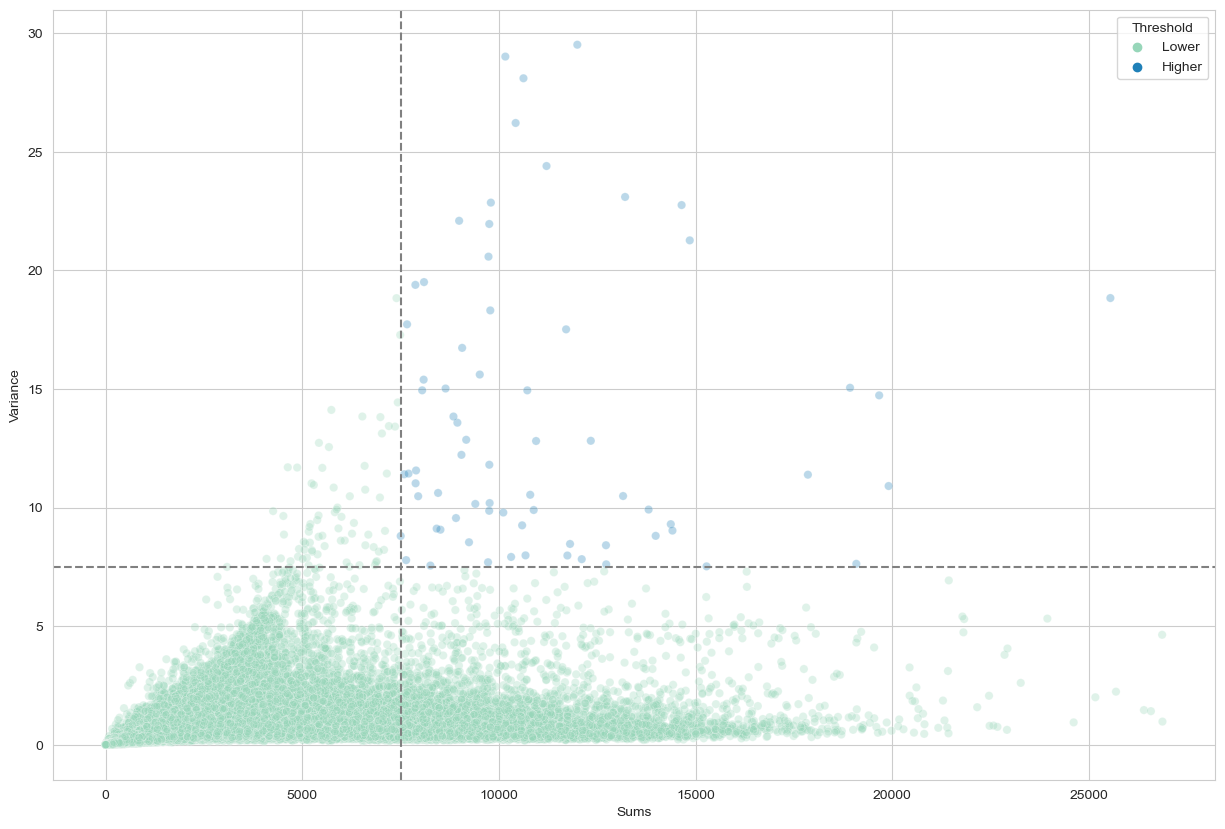

In [5]:
# SCATTERPLOT
# This scatterplot will help to identify how the genes are expressed and grab the ones we're intrested in
plt.figure(figsize = (15, 10))
sns.set_style('whitegrid')

value = (genes_exp['Sums'] > 7500) & (genes_exp['Variance'] > 7.5)
genes_exp['Threshold']= np.where( value == True , 'Higher', 'Lower')
sns.scatterplot(x = genes_exp['Sums'], y = genes_exp['Variance'], hue = genes_exp['Threshold'], palette = 'YlGnBu', alpha = .3)

plt.axhline(y = 7.5, color = 'grey', linestyle = '--')
plt.axvline(x = 7500, color = 'grey', linestyle = '--')

print(pd.Series(genes_exp['Threshold']).value_counts())

plt.savefig('/Volumes/TOSHIBA EXT/4t curs/Advanced Bioinformatics/Project/Python/Graphs/scatterplot.png')

In [6]:
# FILTER DE DATA TO HAVE REPRESENTATIVE SAMPLES FOR GRAPHIC REPRESENTATIONS
means_by_samples = log_df.mean()
samples_mean = means_by_samples.mean()
print (samples_mean)

rep_samples = (means_by_samples >= samples_mean - 0.01) & (means_by_samples <= samples_mean + 0.01)
print(pd.Series(rep_samples).value_counts())
#We apply a really restrictive filter as we don't want really large graphs 

subset = log_df.loc[:, rep_samples]
subset.head(5)

1.3379149035756759
False    1966
True       31
Name: count, dtype: int64


,8215e3ed-ca48-4f0a-8dea-3a10bfef0900.rna_seq.augmented_star_gene_counts.tsv,2c933b04-5fb3-4500-8ee8-70fee015aa81.rna_seq.augmented_star_gene_counts.tsv,2b519912-61c7-4104-b5d4-7a26beb73fd7.rna_seq.augmented_star_gene_counts.tsv,a776ce37-f507-49ac-b459-0653cfb60190.rna_seq.augmented_star_gene_counts.tsv,c2575d99-556e-4efb-9e14-4f387a043607.rna_seq.augmented_star_gene_counts.tsv,ada63890-c4ed-4c3c-a1fc-2c7c1c77aaf8.rna_seq.augmented_star_gene_counts.tsv,452aeaa2-575b-46aa-b8b3-07158cf2bf03.rna_seq.augmented_star_gene_counts.tsv,11302073-0f4b-4cc0-b7e0-3f588a5ddecb.rna_seq.augmented_star_gene_counts.tsv,67980247-ec2a-4804-b4d1-ed752c40577a.rna_seq.augmented_star_gene_counts.tsv,c3878bd6-8b79-422b-9512-0fe3a9df83e7.rna_seq.augmented_star_gene_counts.tsv,...,fb870a60-4b6d-4e83-b366-bdaaca72f205.rna_seq.augmented_star_gene_counts.tsv,8536c3c1-1e75-4ebc-b792-30d7d228a117.rna_seq.augmented_star_gene_counts.tsv,a571bba6-c41c-487b-a13d-a10ebbdf2b92.rna_seq.augmented_star_gene_counts.tsv,7635bae0-a49b-4c58-ae88-de85f60b4ab6.rna_seq.augmented_star_gene_counts.tsv,1ef9fac4-6f3d-43ba-b663-fbd2cc87f48f.rna_seq.augmented_star_gene_counts.tsv,2e90137c-306a-4aee-b772-18827857d2e1.rna_seq.augmented_star_gene_counts.tsv,2d5147ef-d38d-4341-a8da-6c0fa8482cd3.rna_seq.augmented_star_gene_counts.tsv,5e00d446-846f-4be1-a799-fcfe1ba82c46.rna_seq.augmented_star_gene_counts.tsv,43a4d171-846d-49e9-9e61-ce57f83c8bea.rna_seq.augmented_star_gene_counts.tsv,f766816f-972b-4932-9a07-815b18a1d376.rna_seq.augmented_star_gene_counts.tsv
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.15,5.056987,4.420711,4.640390,5.274273,4.490840,3.454794,3.074249,5.248539,6.180194,5.556960,...,6.329312,5.482587,5.131343,4.420880,4.693704,5.542178,5.836909,5.068366,6.033617,5.457424
ENSG00000000005.6,0.812786,0.398241,0.385928,0.635987,0.731009,0.322736,0.176961,0.918081,0.217355,0.000000,...,0.215865,0.000000,0.209890,0.059217,0.504468,0.000000,0.000000,0.000000,0.070801,0.000000
ENSG00000000419.13,5.643614,5.931116,5.161980,5.768708,6.944185,5.615402,5.704869,5.935764,6.261847,7.712330,...,6.323084,7.171924,6.300860,5.451297,5.889155,6.602325,8.113630,6.672376,7.651168,7.684547
ENSG00000000457.14,3.745463,3.625539,3.649409,3.155765,3.061586,3.542530,3.135650,3.995937,2.951662,3.467645,...,3.773638,3.440580,2.517603,3.461280,4.037057,2.952054,4.102751,2.810381,2.951756,3.474670
ENSG00000000460.17,2.617040,2.315131,2.106281,3.072895,2.569199,2.775303,2.729357,2.502509,3.747248,4.153619,...,3.096532,3.755336,2.538613,2.092444,3.117346,2.867936,4.661185,2.139502,2.755721,3.811081


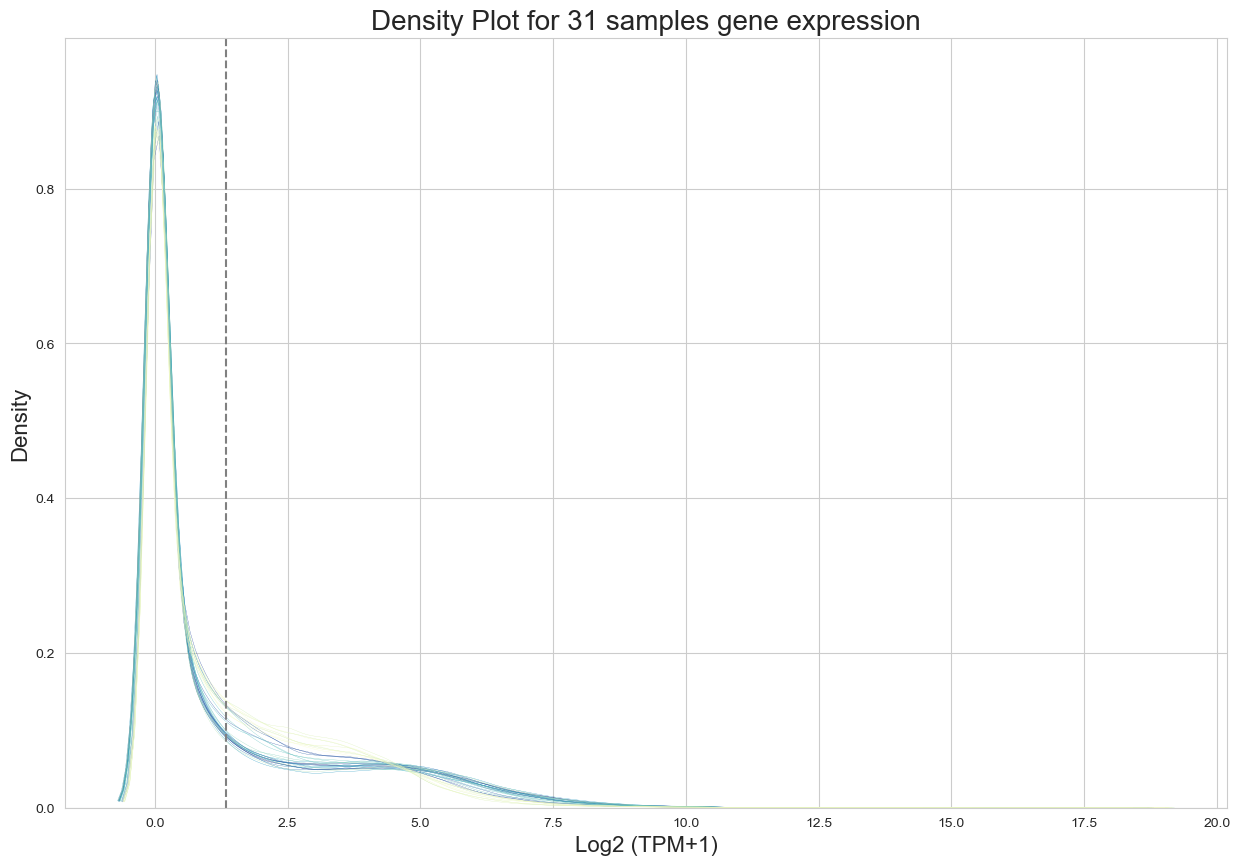

In [7]:
# DENSITY PLOT
plt.figure(figsize = (15, 10))
sns.set_style('whitegrid')

sns.kdeplot(data = subset, common_norm = False, legend = False, palette = 'YlGnBu', linewidth = .2)
plt.axvline(x = samples_mean, color = 'grey', linestyle = '--')

plt.title('Density Plot for 31 samples gene expression', fontsize = 20)
plt.xlabel('Log2 (TPM+1)', fontsize = 16)
plt.ylabel('Density', fontsize = 16)

plt.savefig('/Volumes/TOSHIBA EXT/4t curs/Advanced Bioinformatics/Project/Python/Graphs/densityplot.png')

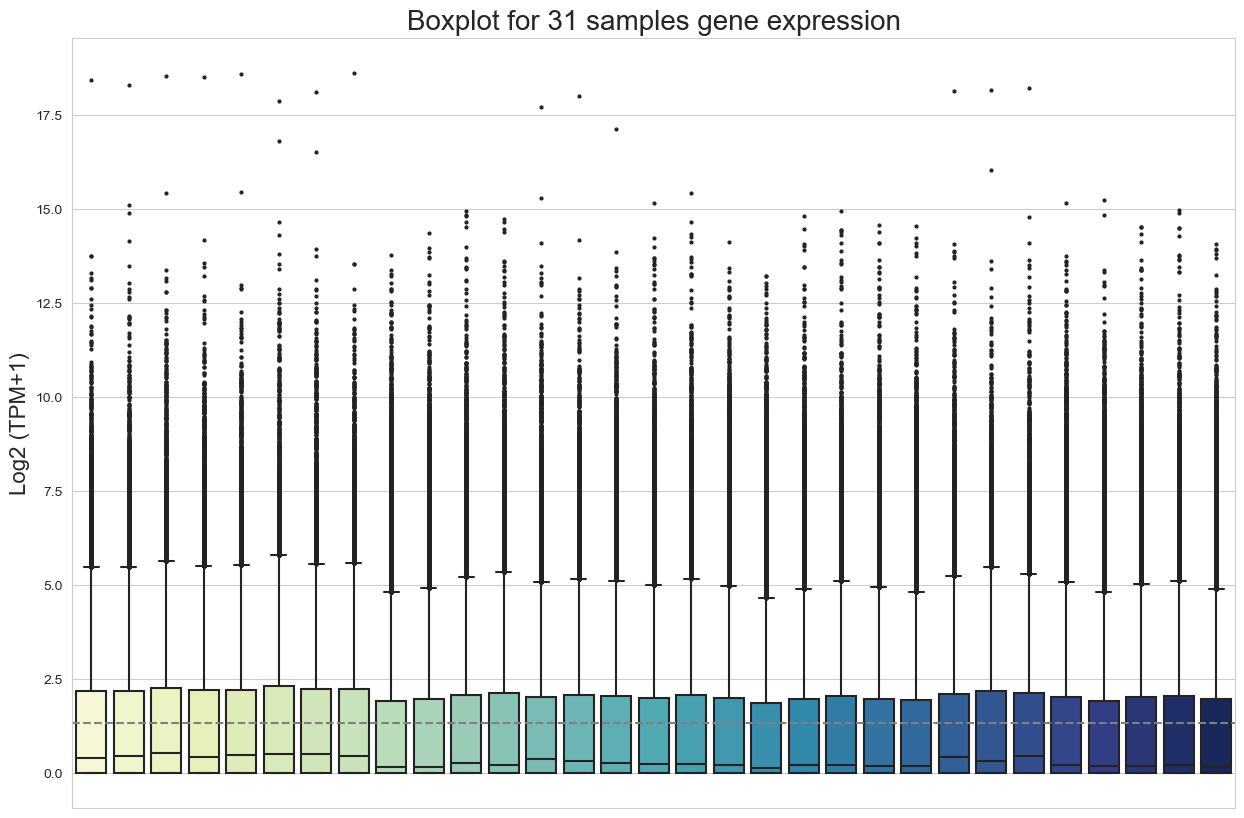

In [8]:
# BOXPLOT
plt.figure(figsize = (15, 10))
sns.set_style('whitegrid')

sns.boxplot(data = subset, palette = 'YlGnBu', flierprops = {'marker': 'o', 'markersize': 2})
plt.axhline(y = samples_mean, color = 'grey', linestyle = '--')
plt. xticks([])

plt.title('Boxplot for 31 samples gene expression', fontsize = 20)
plt.ylabel('Log2 (TPM+1)', fontsize = 16)

plt.savefig('/Volumes/TOSHIBA EXT/4t curs/Advanced Bioinformatics/Project/Python/Graphs/boxplot.png')

In [9]:
# FILTER DE DATA TO GRAB THE MOST EXPRESSED GENES IN ALL THE SAMPLES FOR THE HEATMAP
hm_subset = subset[genes_exp['Threshold'] == 'Higher']
#Now we have a  70 x 31 subset of the data

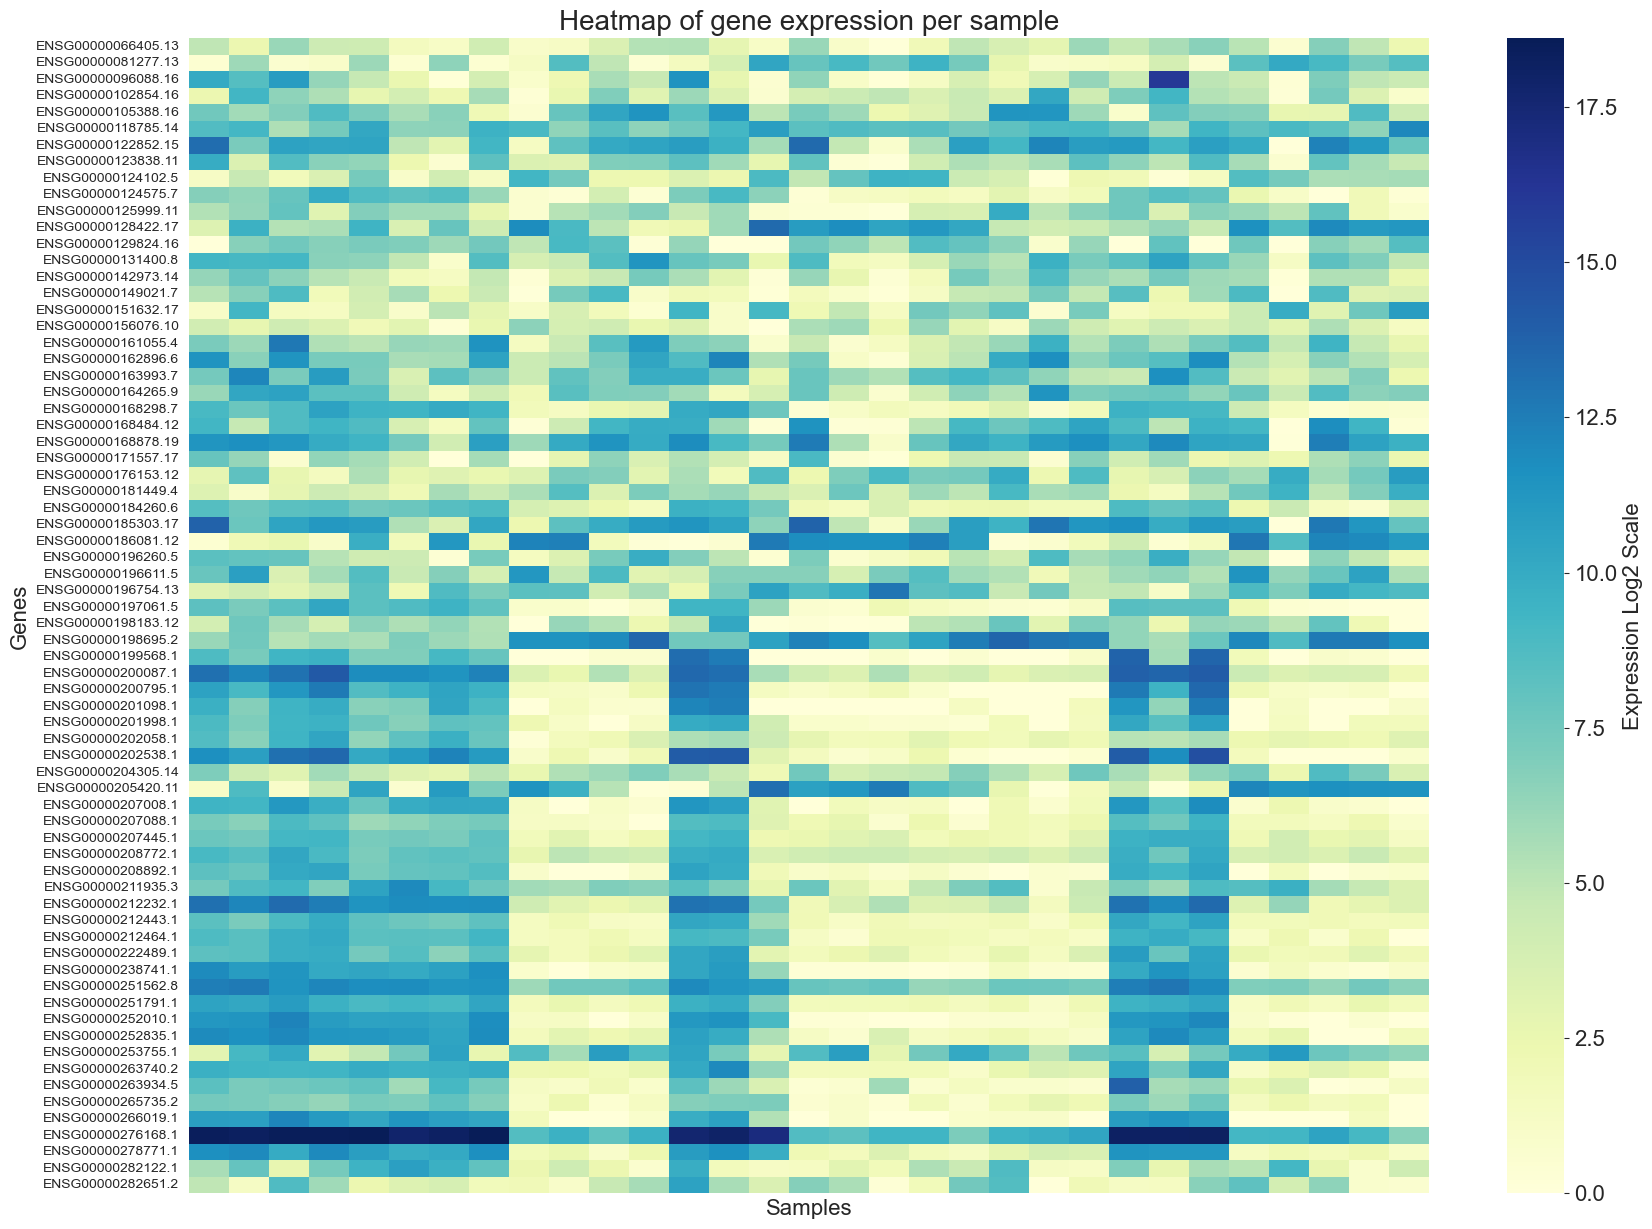

In [10]:
# HEATMAP
plt.figure(figsize=(20, 15))

heatmap = sns.heatmap(hm_subset, cmap='YlGnBu', xticklabels=False, cbar_kws={'label': 'Expression Log Scale'})

plt.title('Heatmap of gene expression per sample', fontsize = 20)
plt.xlabel('Samples', fontsize = 16)
plt.ylabel('Genes', fontsize = 16)

cbar = heatmap.collections[0].colorbar
cbar.ax.set_ylabel('Expression Log2 Scale', fontsize=16)
cbar.ax.tick_params(labelsize=16)

plt.savefig('/Volumes/TOSHIBA EXT/4t curs/Advanced Bioinformatics/Project/Python/Graphs/heatmap.png')